# TUTORIAL 1: DATA FORMAT CONVERSION

## The IIDM format

When navigating through the files of the dataset, one will find that the format of each snapshot file is .xiidm. This format corresponds to an XML export of an IIDM (iTesla Internal Data Model)), which is the format used in the PowSyBl framework. However, users may want to export the grid models to work with a different program. This tutorial will show how to export the grid models to convert from the IIDM to the supported formats and viceversa. Note that some conversions are still unidirectional as some parsers are not yet developed.

**Import (from \* to IIDM):** Importing a file is opening it from a given format (\*) and 'translating' it to the framework format, in this case the IIDM format.

**Export (from IIDM to \*):** Conversely, exporting a file is writing it in a given format (\*) after 'translating' it from the framework format.

To this date, the supported import and export formats are the following:

| Format | Desciption | Import | Export | More information regarding parameters|
|--------|-------------|----------|--------| ------- |
| **PSS/E** | Format for Siemens PSS®E software |<span style="color: green;">YES | <span style="color: green;">YES | [PSS/E format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/psse/index.html) |
| **CIM-CGMES** | Standard format for European grid data exchange | <span style="color: green;">YES | <span style="color: green;">YES | [CGMES format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/cgmes/index.html) |
| **IIDM (XIIDM, JIIDM, BIIDM)** | Internal Data Model in XML, JSON and binary format respectively| <span style="color: green;">YES | <span style="color: green;">YES | [IIDM format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/iidm/index.html) |
| **UCTE-DEF** | Legacy format for European grid data exchange| <span style="color: green;">YES | <span style="color: red;">NO</span> \*| [UCTE-DEF format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/ucte/index.html) |
| **PowerFactory** | Format for DigSILENT PowerFactory software | <span style="color: green;">YES | <span style="color: red;">NO | No data |
| **IEEE-CDF** | IEEE standard format | <span style="color: green;">YES | <span style="color: red;">NO | [IEEE-CDF format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/ieee/ieee.html) |
| **Matpower** | Format for the free and open-source Matlab toolbox | <span style="color: green;">YES | <span style="color: red;">NO | [Matpower format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/matpower/index.html) |
| **AMPL** | Data separated value format to parse with AMPL | <span style="color: red;">NO | <span style="color: green;">YES | [AMPL format in PyPowSyBl](https://powsybl.readthedocs.io/projects/powsybl-core/en/v6.4.0/grid_exchange_formats/ampl/index.html) |

\* Grid models can be exported to UCTE-DEF format only if it was initially loaded from an UCTE-DEF format.
  
## Supported import or export formats


To check which formats are supported, as well as the supported extensions for importing, you can run the following code:

In [1]:
import pypowsybl as pp
import pandas as pd


pd.set_option('display.max_colwidth', None)   # show full contents of every column
pd.set_option('display.width', None)          # don’t line‑wrap rows
pd.set_option('display.max_columns', None)

print(pp.network.get_import_formats())
print(pp.network.get_import_supported_extensions())

['BIIDM', 'CGMES', 'IEEE-CDF', 'JIIDM', 'MATPOWER', 'POWER-FACTORY', 'PSS/E', 'UCTE', 'XIIDM']
['RAW', 'RAWX', 'UCT', 'biidm', 'bin', 'dgs', 'iidm', 'jiidm', 'json', 'mat', 'raw', 'rawx', 'txt', 'uct', 'xiidm', 'xml']


In [2]:
print(pp.network.get_export_formats())

['AMPL', 'BIIDM', 'CGMES', 'JIIDM', 'MATPOWER', 'PSS/E', 'UCTE', 'XIIDM']


## Export a file

The process of exporting is pretty similar to the one described for importing. We can directly save by just inputing the folder we want to save, or the name of the file we want to create:

In [3]:
pp_grid = pp.network.load('data/initial_snapshot.xiidm.bz2')
pp_grid.save('CGMES_model_1', format='CGMES')

Or we can check which parameters can be tweaked and select new values:

In [4]:
pp.network.get_export_parameters(fmt='CGMES')

,description,type,default,possible_values
name,,,,
iidm.export.cgmes.base-name,Basename for output files,STRING,,
iidm.export.cgmes.cim-version,CIM version to export,STRING,,"[16, 100]"
iidm.export.cgmes.export-boundary-power-flows,Export boundaries' power flows,BOOLEAN,true,
iidm.export.cgmes.export-power-flows-for-switches,Export power flows for switches,BOOLEAN,true,
iidm.export.cgmes.naming-strategy,Configure what type of naming strategy you want,STRING,identity,"[identity, cgmes, cgmes-fix-all-invalid-ids]"
iidm.export.cgmes.profiles,Profiles to export,STRING_LIST,"[EQ, TP, SSH, SV]","[EQ, TP, SSH, SV]"
iidm.export.cgmes.cgm_export,"True for a CGM export, False for an IGM export",BOOLEAN,false,
iidm.export.cgmes.boundary-EQ-identifier,Boundary EQ model identifier,STRING,,
iidm.export.cgmes.boundary-TP-identifier,Boundary TP model identifier,STRING,,


In [9]:
# For instance, we choose to only produce the EQ profiles.
pp_grid.save('CGMES_model_2', format='CGMES', parameters={'iidm.export.cgmes.profiles':'EQ'})

## Import a file

### Default method 

The direct method to load a file of one of the supported formats is a straight-forward call to the load function:

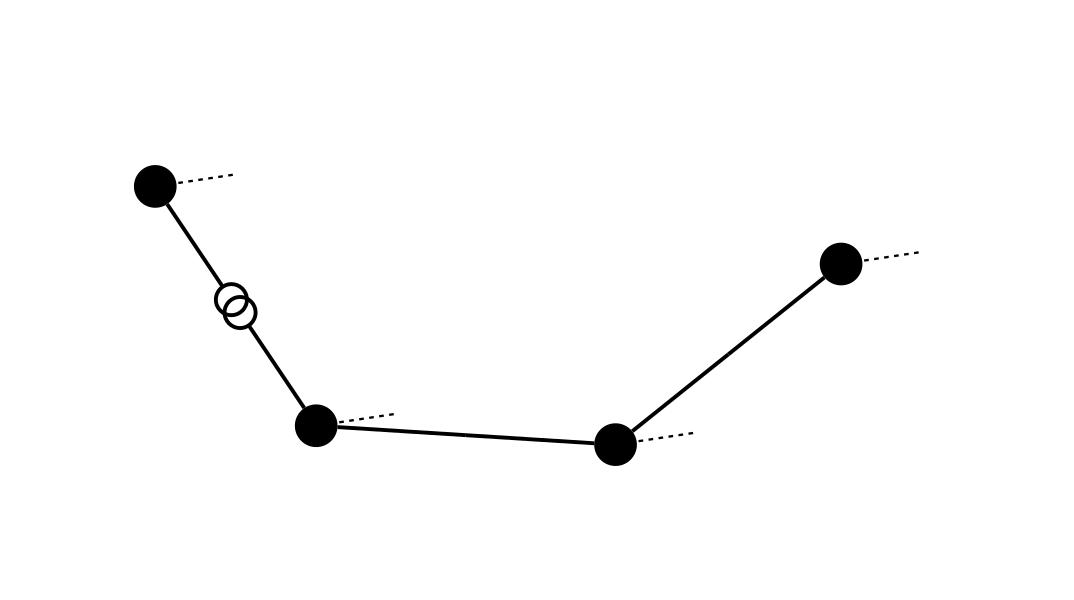

In [4]:
# Example of a PSS/E model
grid_model = pp.network.load('data/psse_grid.raw')

# To display the full network diagram instead of a given selection, we can get the list of all the voltage level indexes uysing pandas DataFrame techinques
vl_ids = grid_model.get_voltage_levels().index.tolist()
diagram = grid_model.get_network_area_diagram(voltage_level_ids=vl_ids)
diagram

### Custom method

Depending on the format, we might want to tweak slightly some parameters of the parser. We can check first which are the options allowed for each format, aswell as its possible values, and then changing the desired parameter.

In [5]:
pp.network.get_import_parameters(fmt='PSS/E')

,description,type,default,possible_values
name,,,,
psse.import.ignore-base-voltage,Ignore base voltage specified in the file,BOOLEAN,false,
psse.import.ignore-node-breaker-topology,Ignore the node breaker topology specified in the substation data of the file,BOOLEAN,false,


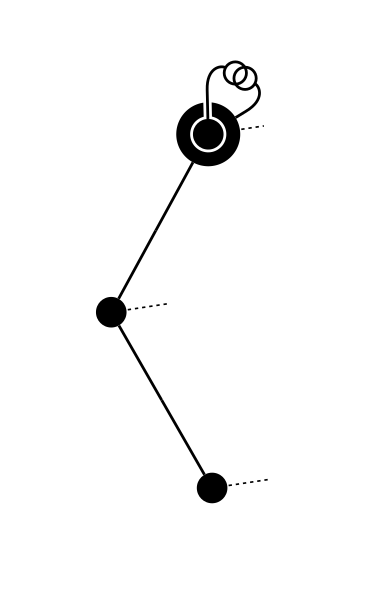

In [6]:
psse_grid = pp.network.load(file='data/psse_grid.raw', parameters={'psse.import.ignore-base-voltage': 'true'})

# To display the full network diagram instead of a given selection, we can get the list of all the voltage level indexes using pandas DataFrame techinques
vl_ids = psse_grid.get_voltage_levels().index.tolist()
diagram = psse_grid.get_network_area_diagram(voltage_level_ids=vl_ids)
diagram

We can see the effect of tweaking one of the input options. In this dummy example we have lost relevant information by removing the base voltage of all the elements.